### Importing Dependencies

In [1]:
import os
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas as pd

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

### Data preview and shape

In [2]:
df = pd.read_excel('../dataset/all_phase_data.xlsx')

In [3]:
print(df.shape)
df.head()


(93, 286)


,SL,Bar code Id,Age,Gender,Company Name,1. What is your occupation?,2. What education did you complete?,3. Can you read Bangla?,4. What is your marital status?,5. What is your monthly family expenditure?,...,5-38. PHC system is workable to prevent NCD diseases..2,5-39. Using PHC system is a good idea..2,5-40. I feel good to receive PHC service..2,5-41. I intend to use PHC system in the future..2,"5-42. If PHC system is available, I will always use it..2",5-43. It is worth to receive PHC service..2,5-44. PHC system is a pleasant experience..2,5-45. I spend time to know about PHC system..2,5-46. Using PHC system causes many advantages..2,5-47. I like to use PHC system..2
0,215,1000236740,56,Female,Grameen Bank,Autonomous,7. Higher (Master or Doctor) completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0
1,116,1001011776,51,Female,Grameen Bank,Autonomous,4. High school completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,4.0,4.0,3.0,1.0,4.0,5.0
2,39,1001014480,60,Male,Grameen Bank,Autonomous,7. Higher (Master or Doctor) completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
3,52,1001014482,54,Male,Grameen Bank,Autonomous,3. Secondary school completed,3. Yes,2. Current married or living together,"4. Taka 20,001-50,000",...,5.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0,4.0,4.0
4,75,1000898321,55,Male,Grameen Bank,Autonomous,6. College/University completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,4.0,4.0


In [4]:
cmn = df[['SL','Bar code Id', 'Age ', 'Gender']]

data = df.drop(columns = ['SL', 'Bar code Id', 'Age ', 'Gender', 'Company Name', 'Blood Hemoglobin Color-1', 'Blood Hemoglobin-1'], axis =1)
# urinary_glucose
# data.replace({'-': 0, '++': 1,}, inplace=True)

#unirary_protein

# data.replace({'+': 1,}, inplace=True)

columns = list(data.columns)
# print(*columns, sep = '\n')
columns

['1. What is your occupation?',
 '2. What education did you complete?',
 '3. Can you read Bangla?',
 '4. What is your marital status?',
 '5. What is your monthly family expenditure?',
 '6. Have you tried to limit any of the following things in your diet in the past 30 days? Have you tried to limit the amount of [READ ITEM] in your diet, yes or no?',
 '7. Have you gained over 10 kg weight after the age of 20?',
 '8. Have you gained or lost over 3 kg weight in the last one year?',
 '9. Do you eat dinner within 2 hours before bedtime three or more times a week?',
 '10. Do you drink sugar contained drinks (Coke, Fanta, Soda, Fruit Juice, other Sweet/Sugar contained drinks) three or more times a week?',
 '11. Do you eat fast foods such as Pizza, Hamburger, Deep Fried Foods (e.g. Singara, Samosa, Moglai Parata, etc.) three or more time a week?',
 '12. Do you skip breakfast three or more times a week?',
 '13. Do you eat faster than others in your similar age and sex?',
 '14. Do you want to im

In [5]:
start_p1 = columns.index('Height-1')
start_p2 = columns.index('Height-2')
start_p3 = columns.index('Height-3')

end_p1 = columns.index('Color-1')
end_p2 = columns.index('Color-2')
end_p3 = columns.index('Color')


colp1 = columns[start_p1:end_p1+1]
colp2 = columns[start_p2:end_p2+1]
colp3 = columns[start_p3:end_p3+1]

In [6]:
print(*colp3, sep = '\n')


Height-3
Weight-3
BMI-3
BMI Color
Waist
Waist Color
Hip
Waist/Hip Ratio
Waist/Hip Ratio Color
Body Temperature
Body Temperature Color
SpO2
SpO2 Color
Blood Pressure(sys)
Blood Pressure(sys) Color
Blood Pressure(dia)
Blood Pressure(dia) Color
Blood Glucose
Blood Glucose Color
Urinary Glucose
Urinary Glucose Color
Urinary Protein
Urinary Protein Color
Pulse Rate
Pulse Rate Color
Arrhythmia
Arrhythmia Color
Blood uric acid
Blood uric acid Color
Color


In [7]:
data_p1 = pd.concat([cmn, data[colp1]], axis=1)
data_p2 = pd.concat([cmn, data[colp2]], axis=1)
data_p3 = pd.concat([cmn, data[colp3]], axis=1)

In [8]:
data_p1.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Arrhythmia Color-1             1.08
Arrhythmia-1                   1.08
Color-1                        0.00
BMI Color-1                    0.00
Body Temperature-1             0.00
Waist/Hip Ratio Color-1        0.00
Waist/Hip Ratio-1              0.00
Hip-1                          0.00
Waist Color-1                  0.00
Waist-1                        0.00
BMI-1                          0.00
SpO2-1                         0.00
Weight-1                       0.00
Height-1                       0.00
Gender                         0.00
Age                            0.00
Bar code Id                    0.00
Body Temperature Color-1       0.00
SpO2 Color-1                   0.00
Blood uric acid Color-1        0.00
Blood Pressure(sys)-1          0.00
Blood Pressure(sys) Color-1    0.00
Blood Pressure(dia)-1          0.00
Blood Pressure(dia) Color-1    0.00
Blood Glucose-1                0.00
Blood Glucose Color-1          0.00
Urinary Glucose-1              0.00
Urinary Glucose Color-1     

In [9]:
data_p2.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Color-2                        0.0
Waist-2                        0.0
Body Temperature Color-2       0.0
Body Temperature-2             0.0
Waist/Hip Ratio Color-2        0.0
Waist/Hip Ratio-2              0.0
Hip-2                          0.0
Waist Color-2                  0.0
BMI Color-2                    0.0
Blood uric acid Color-2        0.0
BMI-2                          0.0
Weight-2                       0.0
Height-2                       0.0
Gender                         0.0
Age                            0.0
Bar code Id                    0.0
SpO2-2                         0.0
SpO2 Color-2                   0.0
Blood Pressure(sys)-2          0.0
Blood Pressure(sys) Color-2    0.0
Blood Pressure(dia)-2          0.0
Blood Pressure(dia) Color-2    0.0
Blood Glucose-2                0.0
Blood Glucose Color-2          0.0
Urinary Glucose-2              0.0
Urinary Glucose Color-2        0.0
Urinary Protein-2              0.0
Urinary Protein Color-2        0.0
Pulse Rate-2        

In [10]:
data_p3.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Color                        0.0
Waist                        0.0
Body Temperature Color       0.0
Body Temperature             0.0
Waist/Hip Ratio Color        0.0
Waist/Hip Ratio              0.0
Hip                          0.0
Waist Color                  0.0
BMI Color                    0.0
Blood uric acid Color        0.0
BMI-3                        0.0
Weight-3                     0.0
Height-3                     0.0
Gender                       0.0
Age                          0.0
Bar code Id                  0.0
SpO2                         0.0
SpO2 Color                   0.0
Blood Pressure(sys)          0.0
Blood Pressure(sys) Color    0.0
Blood Pressure(dia)          0.0
Blood Pressure(dia) Color    0.0
Blood Glucose                0.0
Blood Glucose Color          0.0
Urinary Glucose              0.0
Urinary Glucose Color        0.0
Urinary Protein              0.0
Urinary Protein Color        0.0
Pulse Rate                   0.0
Pulse Rate Color             0.0
Arrhythmia

### Changing string value to numerical values

In [11]:
print(data_p1.shape)
print(data_p2.shape)
print(data_p3.shape)

(93, 34)
(93, 34)
(93, 34)


In [12]:
#remove (PBS) from column
data_p1['Blood Glucose-1'] = data_p1['Blood Glucose-1'].str.rstrip(' (PBS)')
#remove (F from column
data_p1['Blood Glucose-1'] = data_p1['Blood Glucose-1'].str.rstrip(' (F')
#remove Color columns
data_p1 = data_p1.drop("BMI Color-1",1)
data_p1 = data_p1.drop("Waist Color-1",1)
data_p1 = data_p1.drop("Waist/Hip Ratio Color-1",1)
data_p1 = data_p1.drop("Body Temperature Color-1",1)
data_p1 = data_p1.drop("SpO2 Color-1",1)
data_p1 = data_p1.drop("Blood Pressure(sys) Color-1",1)
data_p1 = data_p1.drop("Blood Pressure(dia) Color-1",1)
data_p1 = data_p1.drop("Blood Glucose Color-1",1)
data_p1 = data_p1.drop("Urinary Glucose Color-1",1)
data_p1 = data_p1.drop("Urinary Protein Color-1",1)
data_p1 = data_p1.drop("Pulse Rate Color-1",1)
data_p1 = data_p1.drop("Arrhythmia-1",1)
data_p1 = data_p1.drop("Arrhythmia Color-1",1)
data_p1 = data_p1.drop("Blood uric acid Color-1",1)
data_p1.head()

,SL,Bar code Id,Age,Gender,Height-1,Weight-1,BMI-1,Waist-1,Hip-1,Waist/Hip Ratio-1,Body Temperature-1,SpO2-1,Blood Pressure(sys)-1,Blood Pressure(dia)-1,Blood Glucose-1,Urinary Glucose-1,Urinary Protein-1,Pulse Rate-1,Blood uric acid-1,Color-1
0,215,1000236740,56,Female,145,44.2,21.02,76.0,84,0.90,97.34,98,105,70,118.8,-,-,104,8.9,4
1,116,1001011776,51,Female,158,54.6,21.87,82.0,92,0.89,97.88,98,122,66,111.6,-,-,75,7.1,4
2,39,1001014480,60,Male,165,73.6,27.03,90.0,93,0.97,95.90,95,110,71,102.6,-,-,66,8.1,4
3,52,1001014482,54,Male,170,73.0,25.26,94.0,98,0.96,93.74,96,130,86,122.4,-,-,87,8.7,4
4,75,1000898321,55,Male,164,61.2,22.75,90.0,90,1.00,94.46,98,124,83,387,++,-,79,3.1,4


In [13]:
#remove color columns
data_p2 = data_p2.drop("BMI Color-2",1)
data_p2 = data_p2.drop("Waist Color-2",1)
data_p2 = data_p2.drop("Waist/Hip Ratio Color-2",1)
data_p2 = data_p2.drop("Body Temperature Color-2",1)
data_p2 = data_p2.drop("SpO2 Color-2",1)
data_p2 = data_p2.drop("Blood Pressure(sys) Color-2",1)
data_p2 = data_p2.drop("Blood Pressure(dia) Color-2",1)
data_p2 = data_p2.drop("Blood Glucose Color-2",1)
data_p2 = data_p2.drop("Urinary Glucose Color-2",1)
data_p2 = data_p2.drop("Urinary Protein Color-2",1)
data_p2 = data_p2.drop("Pulse Rate Color-2",1)
data_p2 = data_p2.drop("Arrhythmia-2",1)
data_p2 = data_p2.drop("Arrhythmia Color-2",1)
data_p2 = data_p2.drop("Blood uric acid Color-2",1)
data_p2.head()

,SL,Bar code Id,Age,Gender,Height-2,Weight-2,BMI-2,Waist-2,Hip-2,Waist/Hip Ratio-2,Body Temperature-2,SpO2-2,Blood Pressure(sys)-2,Blood Pressure(dia)-2,Blood Glucose-2,Urinary Glucose-2,Urinary Protein-2,Pulse Rate-2,Blood uric acid-2,Color-2
0,215,1000236740,56,Female,145,43.6,20.74,77,82,0.94,96.80,98,112,72,95.4,-,-,94,7.3,4
1,116,1001011776,51,Female,158,57.5,23.03,80,90,0.89,97.16,99,124,69,192.6,-,-,81,8.1,4
2,39,1001014480,60,Male,165,77.0,28.28,94,98,0.96,96.26,96,111,73,147.6,-,-,67,8.2,4
3,52,1001014482,54,Male,170,74.0,25.61,95,98,0.97,96.26,97,135,84,160.2,-,-,88,9.2,4
4,75,1000898321,55,Male,164,65.2,24.24,94,89,1.06,95.54,98,129,85,345.6,++,-,96,5.9,4


In [14]:
#remove color columns
data_p3 = data_p3.drop("BMI Color",1)
data_p3 = data_p3.drop("Waist Color",1)
data_p3 = data_p3.drop("Waist/Hip Ratio Color",1)
data_p3 = data_p3.drop("Body Temperature Color",1)
data_p3 = data_p3.drop("SpO2 Color",1)
data_p3 = data_p3.drop("Blood Pressure(sys) Color",1)
data_p3 = data_p3.drop("Blood Pressure(dia) Color",1)
data_p3 = data_p3.drop("Blood Glucose Color",1)
data_p3 = data_p3.drop("Urinary Glucose Color",1)
data_p3 = data_p3.drop("Urinary Protein Color",1)
data_p3 = data_p3.drop("Pulse Rate Color",1)
data_p3 = data_p3.drop("Arrhythmia",1)
data_p3 = data_p3.drop("Arrhythmia Color",1)
data_p3 = data_p3.drop("Blood uric acid Color",1)
data_p3.head()

,SL,Bar code Id,Age,Gender,Height-3,Weight-3,BMI-3,Waist,Hip,Waist/Hip Ratio,Body Temperature,SpO2,Blood Pressure(sys),Blood Pressure(dia),Blood Glucose,Urinary Glucose,Urinary Protein,Pulse Rate,Blood uric acid,Color
0,215,1000236740,56,Female,145,43.4,20.64,74,84,0.88,95.90,97,114,64,111.6,-,-,87,7.1,4
1,116,1001011776,51,Female,158,55.2,22.11,78,88,0.89,95.00,99,134,84,129.6,-,-,69,8.5,4
2,39,1001014480,60,Male,165,76.3,28.03,95,97,0.98,95.90,98,123,83,136.8,-,-,75,8.5,4
3,52,1001014482,54,Male,170,74.5,25.78,96,96,1.00,96.44,97,134,89,142.2,-,-,89,8.0,4
4,75,1000898321,55,Male,164,63.8,23.72,93,87,1.07,95.00,97,111,81,324.0,++,-,80,4.3,4


### generating derived feature BMI and w/h

### dropping composition elements of bmi

In [15]:
data_p1 = data_p1.drop( columns = ['Height-1', 'Weight-1', 'Waist-1', 'Hip-1'], axis=1)
data_p2 = data_p2.drop( columns = ['Height-2', 'Weight-2', 'Waist-2', 'Hip-2'], axis=1)
data_p3 = data_p3.drop( columns = ['Height-3', 'Weight-3', 'Waist', 'Hip'], axis=1)

In [16]:
data_p1 = data_p1.rename(columns={
    'BMI-1': 'BMI',
    'Waist/Hip Ratio-1': 'Waist/Hip',
    'Body Temperature-1': 'Body Temperature',
    'SpO2-1':'SpO2',
    'Blood Pressure(sys)-1':'Blood Pressure(sys)',
    'Blood Pressure(dia)-1':'Blood Pressure(dia)',
    'Blood Glucose-1':'Blood Glucose',
    'Urinary Glucose-1':'Urinary Glucose',
    'Urinary Protein-1':'Urinary Protein',
    'Pulse Rate-1':'Pulse Rate',
    'Blood uric acid-1':'Blood uric acid',
    'Color-1':'Color',    
})
data_p1.head()

,SL,Bar code Id,Age,Gender,BMI,Waist/Hip,Body Temperature,SpO2,Blood Pressure(sys),Blood Pressure(dia),Blood Glucose,Urinary Glucose,Urinary Protein,Pulse Rate,Blood uric acid,Color
0,215,1000236740,56,Female,21.02,0.90,97.34,98,105,70,118.8,-,-,104,8.9,4
1,116,1001011776,51,Female,21.87,0.89,97.88,98,122,66,111.6,-,-,75,7.1,4
2,39,1001014480,60,Male,27.03,0.97,95.90,95,110,71,102.6,-,-,66,8.1,4
3,52,1001014482,54,Male,25.26,0.96,93.74,96,130,86,122.4,-,-,87,8.7,4
4,75,1000898321,55,Male,22.75,1.00,94.46,98,124,83,387,++,-,79,3.1,4


In [17]:
data_p2 = data_p2.rename(columns={
    'BMI-2': 'BMI',
    'Waist/Hip Ratio-2': 'Waist/Hip',
    'Body Temperature-2': 'Body Temperature',
    'SpO2-2':'SpO2',
    'Blood Pressure(sys)-2':'Blood Pressure(sys)',
    'Blood Pressure(dia)-2':'Blood Pressure(dia)',
    'Blood Glucose-2':'Blood Glucose',
    'Urinary Glucose-2':'Urinary Glucose',
    'Urinary Protein-2':'Urinary Protein',
    'Pulse Rate-2':'Pulse Rate',
    'Blood uric acid-2':'Blood uric acid',
    'Color-2':'Color',    
})
data_p2.head()

,SL,Bar code Id,Age,Gender,BMI,Waist/Hip,Body Temperature,SpO2,Blood Pressure(sys),Blood Pressure(dia),Blood Glucose,Urinary Glucose,Urinary Protein,Pulse Rate,Blood uric acid,Color
0,215,1000236740,56,Female,20.74,0.94,96.80,98,112,72,95.4,-,-,94,7.3,4
1,116,1001011776,51,Female,23.03,0.89,97.16,99,124,69,192.6,-,-,81,8.1,4
2,39,1001014480,60,Male,28.28,0.96,96.26,96,111,73,147.6,-,-,67,8.2,4
3,52,1001014482,54,Male,25.61,0.97,96.26,97,135,84,160.2,-,-,88,9.2,4
4,75,1000898321,55,Male,24.24,1.06,95.54,98,129,85,345.6,++,-,96,5.9,4


In [18]:
data_p3 = data_p3.rename(columns={
    'BMI-3': 'BMI',  
})
data_p3.head()

,SL,Bar code Id,Age,Gender,BMI,Waist/Hip Ratio,Body Temperature,SpO2,Blood Pressure(sys),Blood Pressure(dia),Blood Glucose,Urinary Glucose,Urinary Protein,Pulse Rate,Blood uric acid,Color
0,215,1000236740,56,Female,20.64,0.88,95.90,97,114,64,111.6,-,-,87,7.1,4
1,116,1001011776,51,Female,22.11,0.89,95.00,99,134,84,129.6,-,-,69,8.5,4
2,39,1001014480,60,Male,28.03,0.98,95.90,98,123,83,136.8,-,-,75,8.5,4
3,52,1001014482,54,Male,25.78,1.00,96.44,97,134,89,142.2,-,-,89,8.0,4
4,75,1000898321,55,Male,23.72,1.07,95.00,97,111,81,324.0,++,-,80,4.3,4


In [22]:
data_p3.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Color                  0.0
Blood uric acid        0.0
Pulse Rate             0.0
Urinary Protein        0.0
Urinary Glucose        0.0
Blood Glucose          0.0
Blood Pressure(dia)    0.0
Blood Pressure(sys)    0.0
SpO2                   0.0
Body Temperature       0.0
Waist/Hip Ratio        0.0
BMI                    0.0
Gender                 0.0
Age                    0.0
Bar code Id            0.0
SL                     0.0
dtype: float64

### saving cleanded data

In [20]:
data_p1.to_csv('../dataset/p1_cleaned_data.csv')
data_p2.to_csv('../dataset/p2_cleaned_data.csv')
data_p3.to_csv('../dataset/p3_cleaned_data.csv')

<AxesSubplot:>

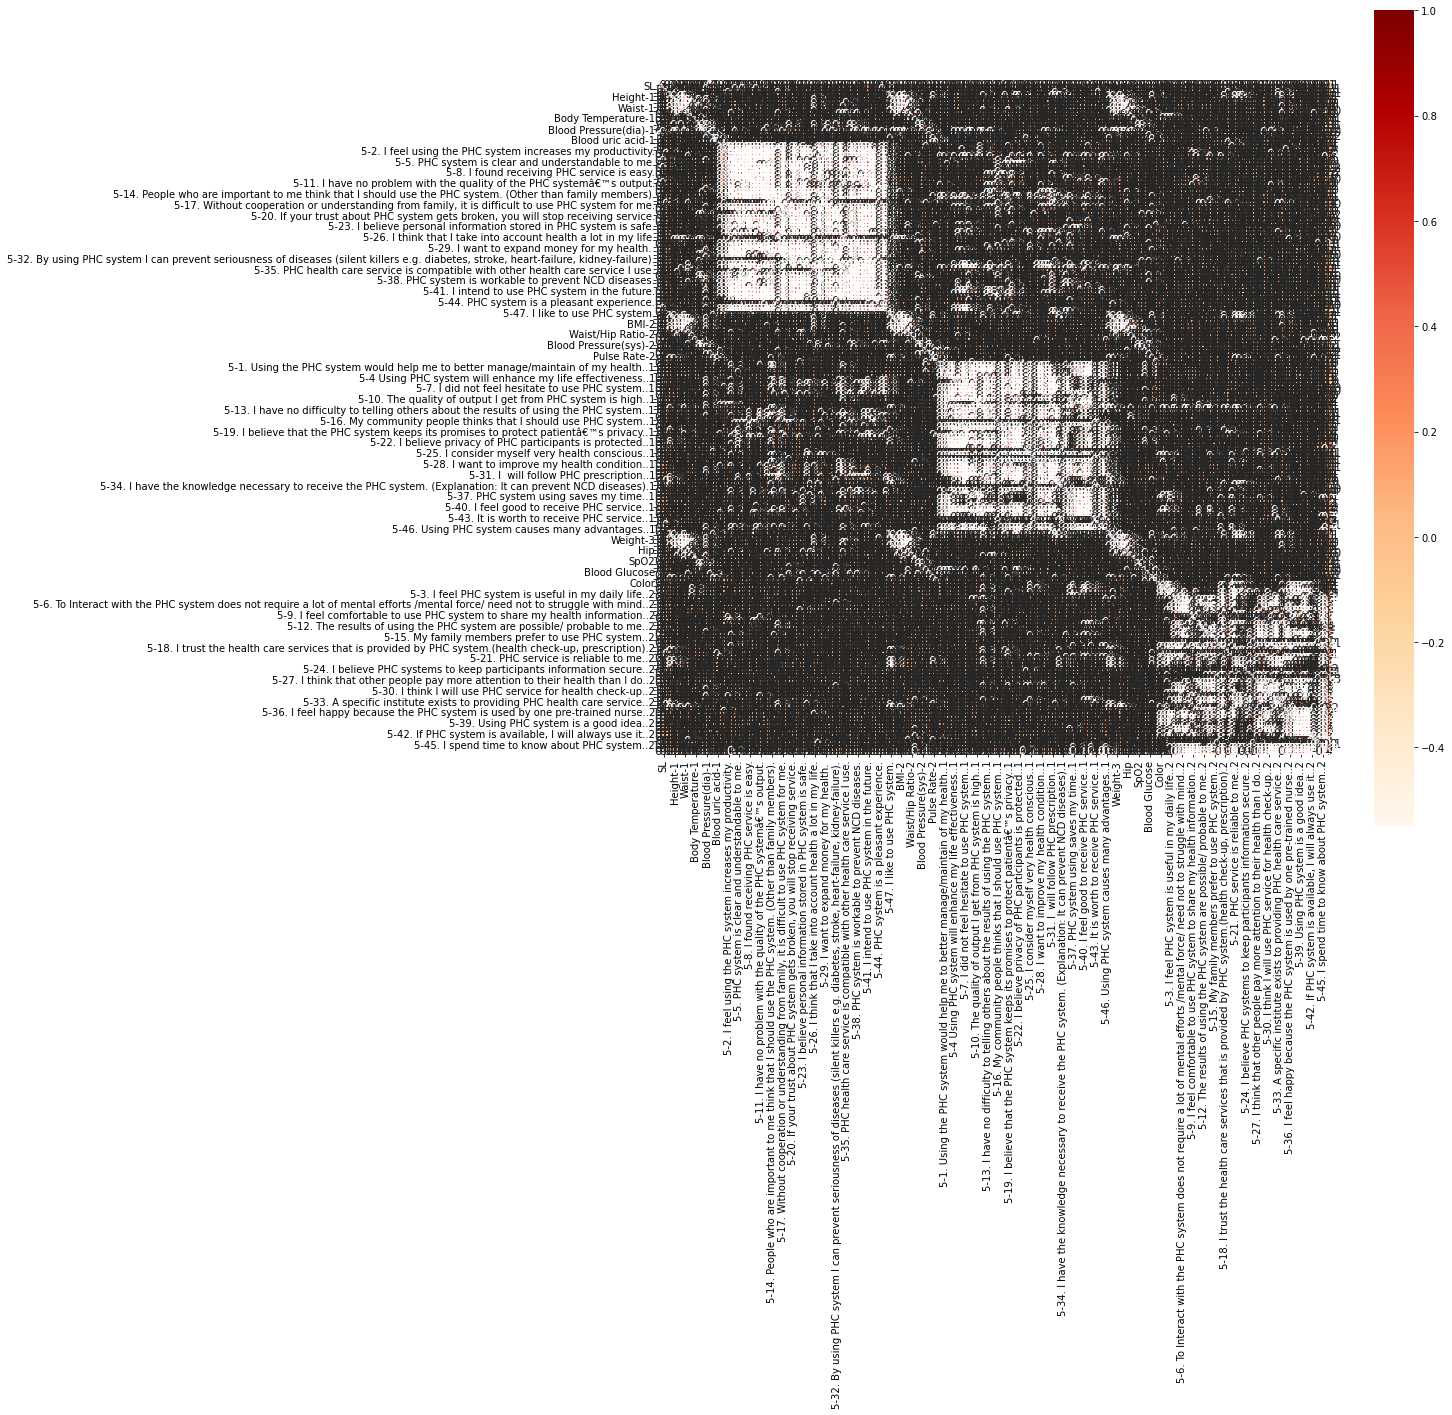

In [21]:
correlation = df.corr()

# constructing a heatmap to undestand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap = 'OrRd')